<a href="https://colab.research.google.com/github/adnansamisk/Penguins-Classification-Analysis/blob/main/Penguin_Classification_Analysis_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Penguin Classification Analysis

Problem Statement:
The Penguin Classification Analysis problem involves predicting the species of a penguin
based on various physical characteristics. The dataset includes information about the body
mass, culmen length, culmen depth, flipper length, and sex of different penguin species.
The problem is typically approached as a classification problem, where the target variable is
the penguin species, and the features are the physical characteristics of the penguins.
Accurate classification of penguin species can also help researchers understand the effects of
climate change and other environmental factors on penguin populations. The problem can
also be useful for conservation efforts, as it can help identify and protect endangered penguin
species.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Attribute Information:

Species: penguin species (Chinstrap, Adélie, or Gentoo)

Island: island name (Dream, Torgersen, or Biscoe) in Antarctica

culmen_length_mm: culmen length (mm)

culmen_depth_mm: culmen depth (mm)

flipper_length_mm: flipper length (mm)

body_mass_g: body mass (g)

Sex: penguin sex

# Importing Packages

In [ ]:
import plotly.express as px
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#Removes the limit from the number of displayed columns and rows. 
# This is so I can see the entire dataframe when I print it 
pd.set_option("display.max_columns", None)

#pd.set_option('display.max_rows', None) 
pd.set_option("display.max_rows", 200)

#To build Linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import (
    RandomForestRegressor, 
    AdaBoostRegressor,
    GradientBoostingRegressor,
    StackingRegressor,
)
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

import warnings

warnings.filterwarnings("ignore")

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.cluster import KMeans

#Loading And Exploring The Data

In [ ]:
# Load the CSV file into a pandas DataFrame
# -*- coding: utf-8 -*-
df = pd.read_csv('/content/drive/MyDrive/penguins_size.csv')

# View the first few rows of the DataFrame
print(df.head())

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


# Data Visualization

In [ ]:
df["sex"] = df["sex"].replace(["MALE", "FEMALE"], [1, 0])
print(df.head())

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g  sex  
0       3750.0  1.0  
1       3800.0  0.0  
2       3250.0  0.0  
3          NaN  NaN  
4       3450.0  0.0  


count        344
unique         3
top       Adelie
freq         152
Name: species, dtype: object


<Axes: xlabel='species', ylabel='Count'>

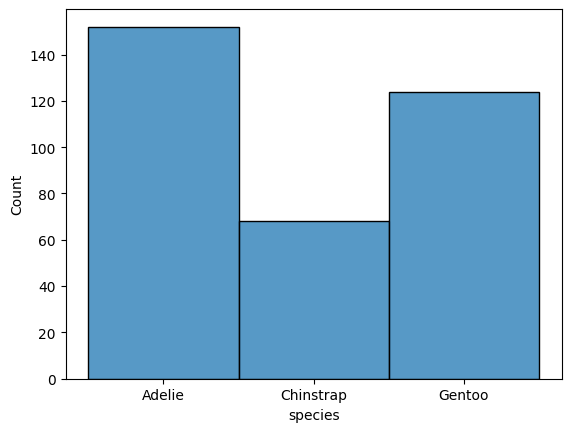

In [ ]:
# Select a numerical variable for analysis
num_var1 = 'species'
num_var2 = 'island'
num_var3 = 'sex'
# Descriptive statistics
print(df[num_var1].describe())
sns.histplot(df.species)

<Axes: xlabel='body_mass_g', ylabel='Density'>

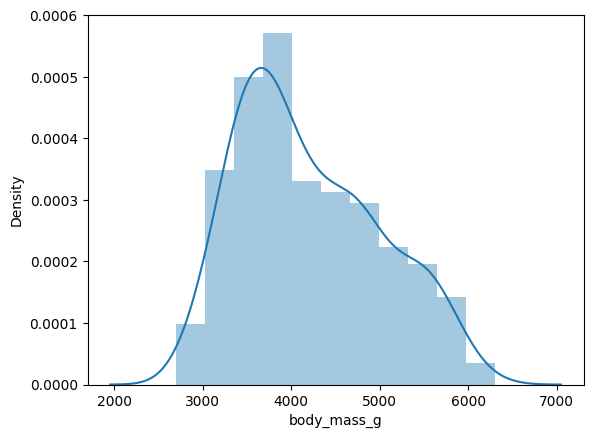

In [ ]:
sns.distplot(df.body_mass_g)

<Axes: xlabel='body_mass_g'>

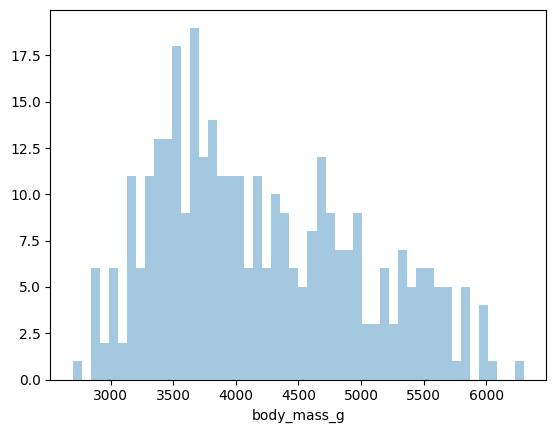

In [ ]:
sns.distplot(df.body_mass_g,kde=False,bins=50)

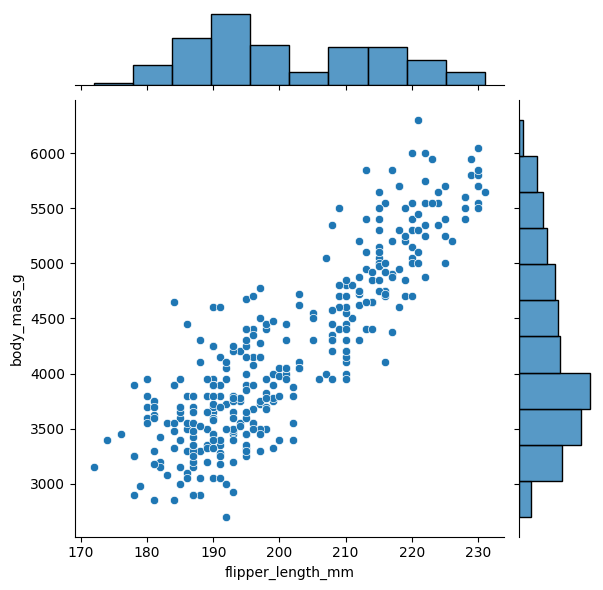

In [ ]:
sns.jointplot(x = df['flipper_length_mm'], y = df['body_mass_g'], kind = 'scatter')

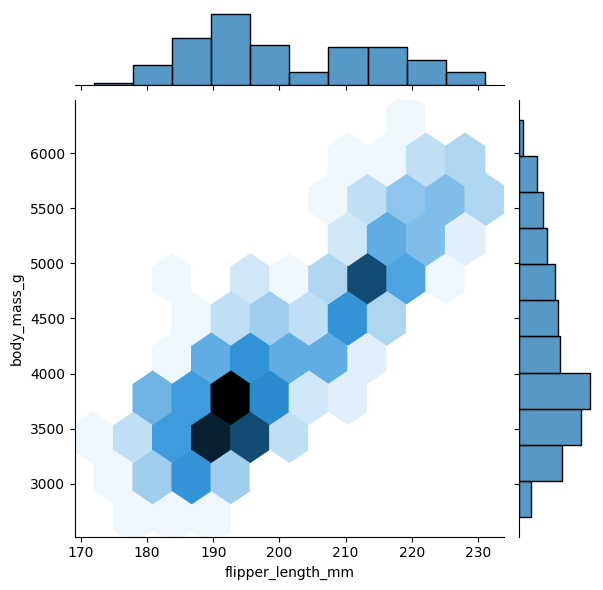

In [ ]:
sns.jointplot(x = df['flipper_length_mm'], y = df['body_mass_g'], kind = 'hex')

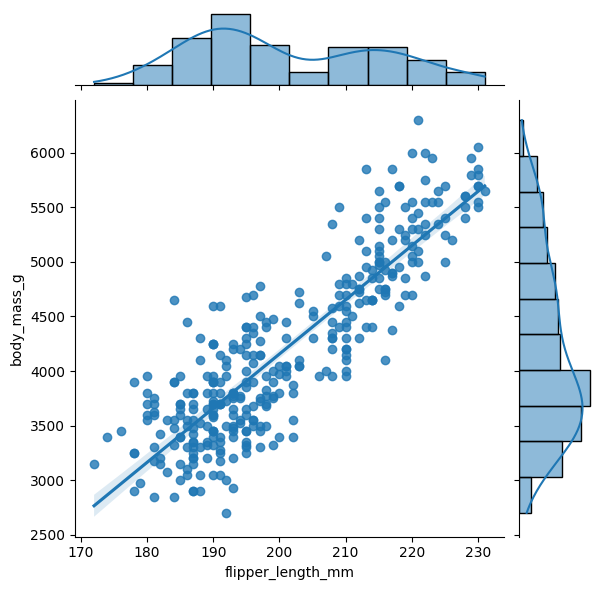

In [ ]:
## 3b) BiVariate Analysis - 2 value comparision.
sns.jointplot(x = df['flipper_length_mm'], y = df['body_mass_g'], kind = 'reg')

<Axes: xlabel='body_mass_g'>

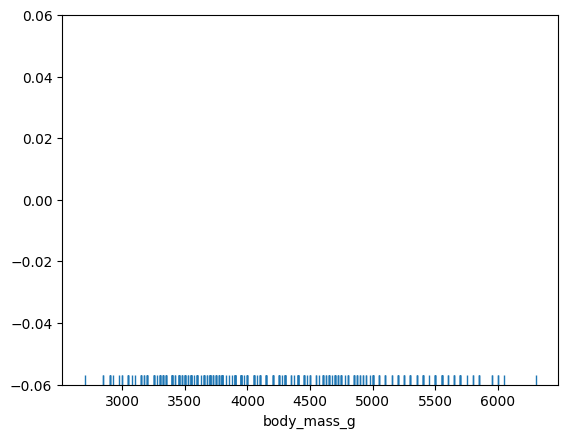

In [ ]:
sns.rugplot(x = df['body_mass_g'])

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

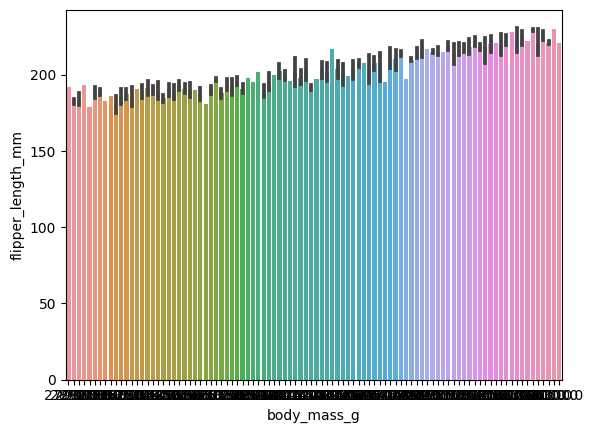

In [ ]:
sns.barplot(x = df['body_mass_g'], y = df['flipper_length_mm'])

<Axes: ylabel='count'>

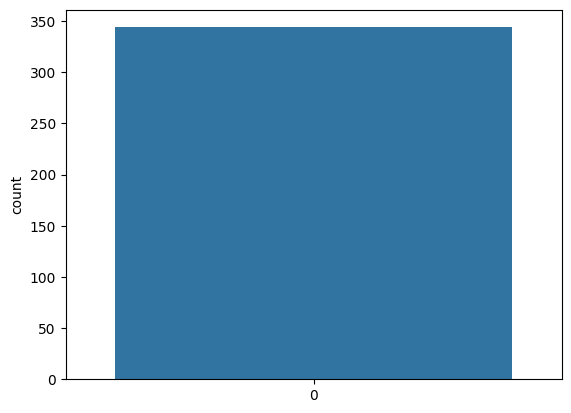

In [ ]:
sns.countplot(df['body_mass_g'])

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

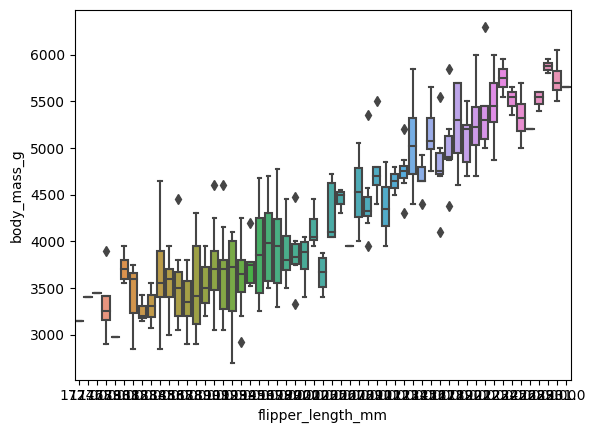

In [ ]:
sns.boxplot(x = df['flipper_length_mm'], y = df['body_mass_g'])

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

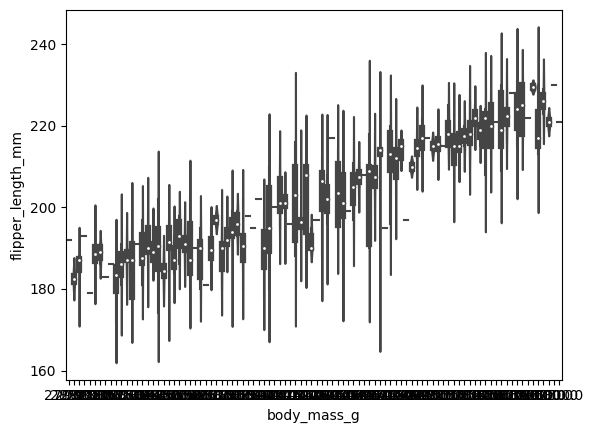

In [ ]:
sns.violinplot(x = df['body_mass_g'], y = df['flipper_length_mm'])

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

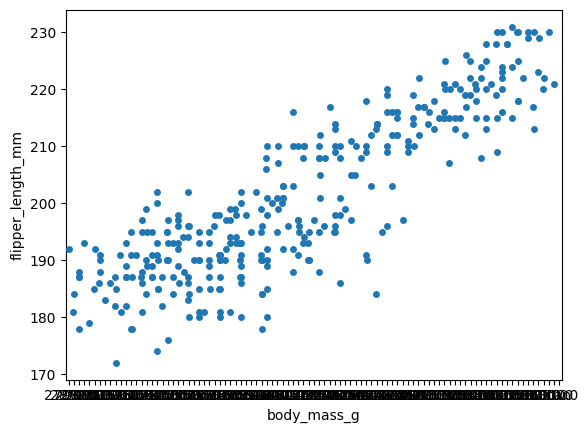

In [ ]:
sns.stripplot(y = df['flipper_length_mm'], x = df['body_mass_g'])

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

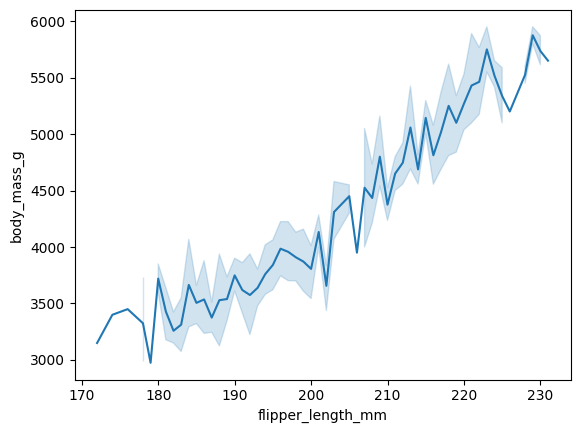

In [ ]:
sns.lineplot(x = df['flipper_length_mm'], y = df['body_mass_g'])

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

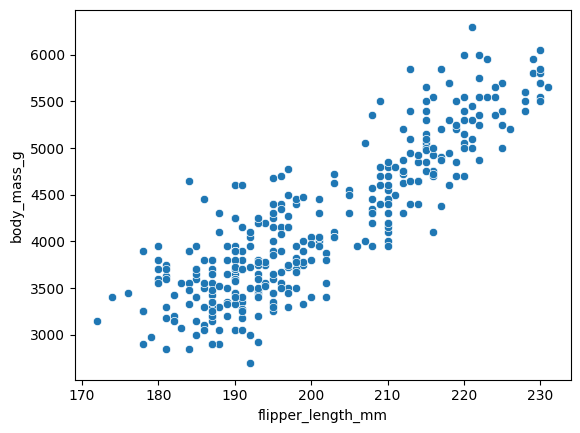

In [ ]:
sns.scatterplot(x = df['flipper_length_mm'], y = df['body_mass_g'])

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

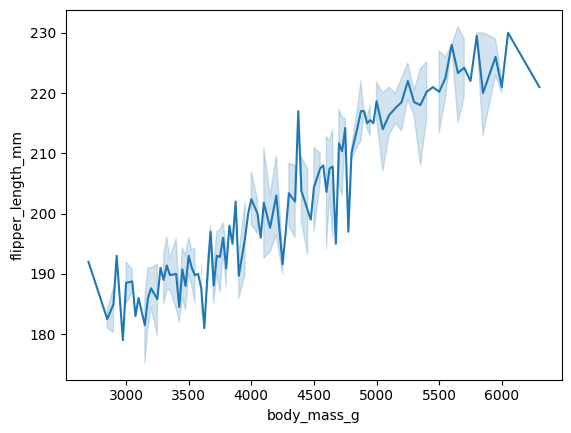

In [ ]:
sns.lineplot(x = df['body_mass_g'], y = df['flipper_length_mm'])

<Axes: >

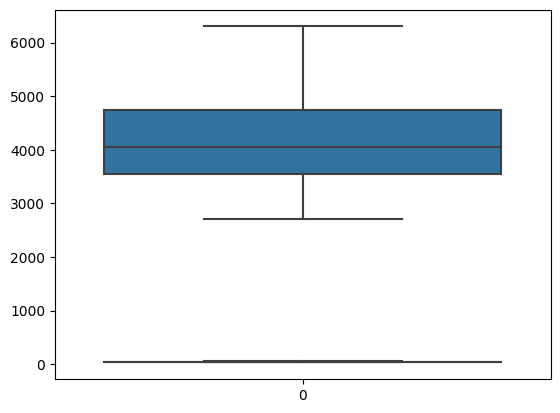

In [ ]:
## 3c) MultiVariate Analysis - multiple values can be provided ##
sns.boxplot(df.body_mass_g)
sns.boxplot(df.culmen_length_mm)


# Descriptive statistics

In [ ]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

# Checking for Missing Values

In [ ]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
df = df.dropna(axis=0)

In [ ]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# Outliers

In [15]:
def remove_outlier (col):
    sorted(col)
    q1, q3= np.quantile (col, [0.25, 0.75])
    iqr =  q3 - q1
    ll = q1 - 1.5 * iqr
    ul = q3 + 1.5* iqr
    return ll, ul

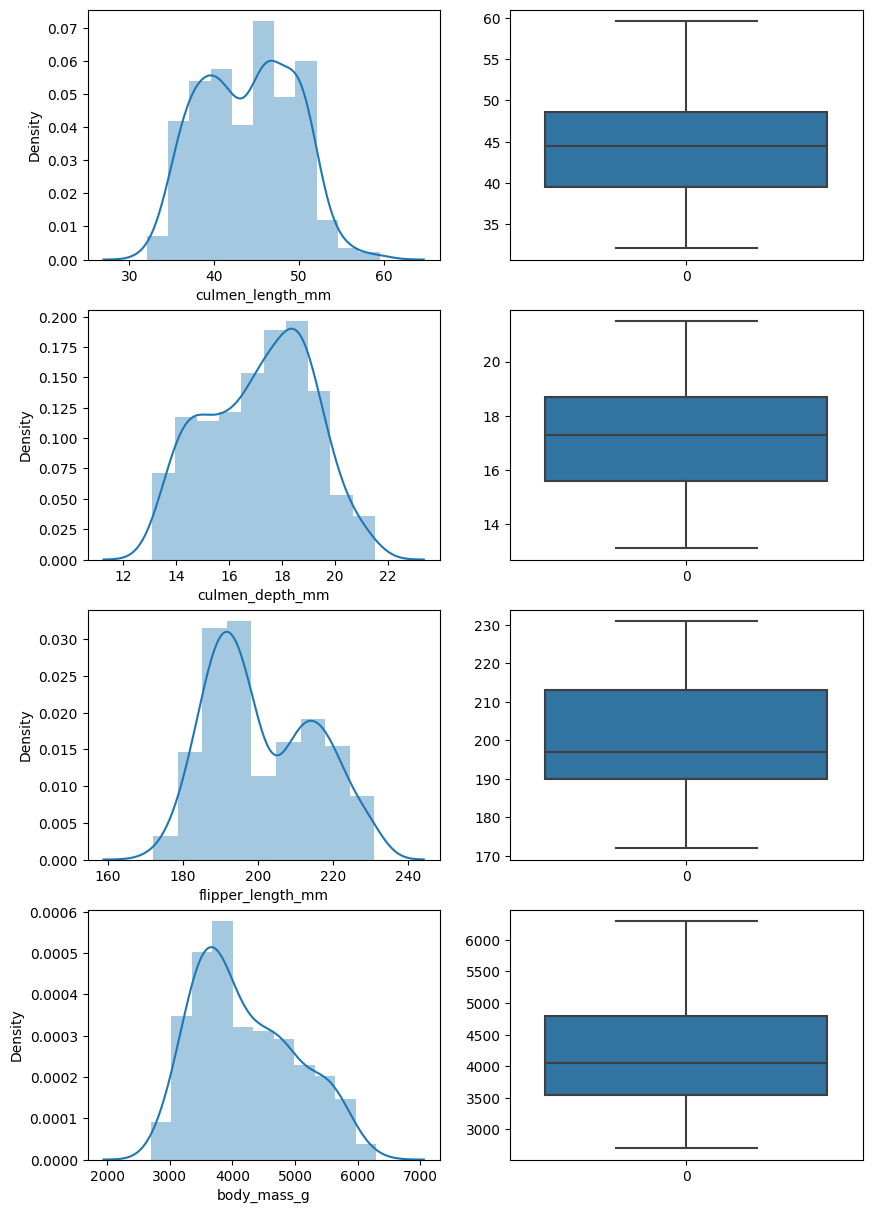

In [16]:
a = 1
plt.figure(figsize=(10, 50))
for i in df[    
      [
          'species', 
          'island',
          'culmen_length_mm', 
          'culmen_depth_mm',
          'flipper_length_mm', 
          'body_mass_g',  
          'sex'
      ]
]:
      if df[i].dtype != "object":
          plt.subplot(13, 2, a) 
          sns.distplot(df[i])
          # plt.title("Histogram for:" + i) 
          plt.subplot(13, 2, a + 1) 
          sns.boxplot(df[i])
          # plt.title("Boxplot for:" + i)
          a += 2

# Dependable and Independent variables

In [14]:
X1 = df.drop(["body_mass_g"], axis=1) 
y1=df[["body_mass_g"]]

X1.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex
0,Adelie,Torgersen,39.1,18.7,181.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,MALE


In [17]:
y1.head()

,body_mass_g
0,3750.0
1,3800.0
2,3250.0
4,3450.0
5,3650.0


In [18]:
X1 = pd.get_dummies(X1, columns=["species","island"], drop_first=True) 
X1.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
0,39.1,18.7,181.0,MALE,0,0,0,1
1,39.5,17.4,186.0,FEMALE,0,0,0,1
2,40.3,18.0,195.0,FEMALE,0,0,0,1
4,36.7,19.3,193.0,FEMALE,0,0,0,1
5,39.3,20.6,190.0,MALE,0,0,0,1


# Clustring

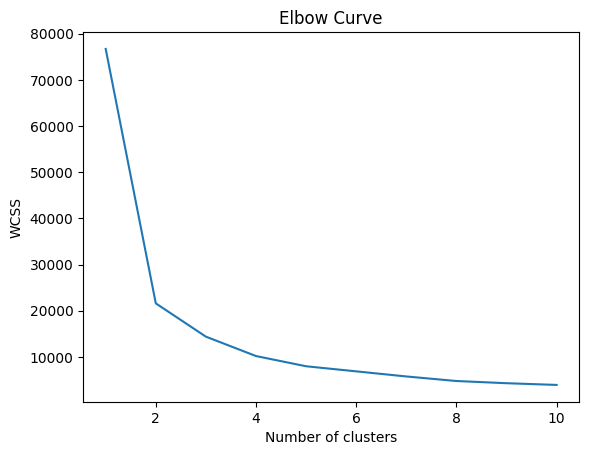

[[ 45.95483871  18.70107527 196.7311828 ]
 [ 47.6047619   15.24920635 216.92063492]
 [ 38.45304348  18.00869565 187.05217391]]
[2 2 0 2 2 2 0 2 2 0 2 0 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0
 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 0 0 2 0 2 2 2 0
 2 0 2 2 2 0 2 2 2 2 0 0 2 2 2 1 2 0 2 0 2 0 2 2 2 2 0 2 2 0 0 0 2 0 2 0 2
 0 2 2 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0
 0 2 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 0 1 0
 0 1 2 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]


In [19]:
# Select the columns to be used for clustering
C = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', ]]

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(C)
    wcss.append(kmeans.inertia_)
    
# Plot the elbow curve to help determine the optimal number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Set the number of clusters based on the elbow curve
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Perform clustering on the data
kmeans.fit(C)

# Print the cluster centers and the labels for each data point
print(kmeans.cluster_centers_)
print(kmeans.labels_)


# Splitting the data into dependent and independent variables.

In [ ]:
# split the first dataset for price prediction into train and test
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(
     X1, y1, test_size=0.3, random_state=42
)

# Building model and Training 


In [ ]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                  float64
dtype: object

In [ ]:
df._get_numeric_data()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1.0
1,39.5,17.4,186.0,3800.0,0.0
2,40.3,18.0,195.0,3250.0,0.0
4,36.7,19.3,193.0,3450.0,0.0
5,39.3,20.6,190.0,3650.0,1.0
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0.0
340,46.8,14.3,215.0,4850.0,0.0
341,50.4,15.7,222.0,5750.0,1.0
342,45.2,14.8,212.0,5200.0,0.0


In [ ]:
linearregression1 = LinearRegression() 
linearregression1.fit(X1_train, y1_train)

LinearRegression()

In [ ]:
for idx, col_name in enumerate(X1_train.columns):
    print(
          "The coefficient for {} is {}".format(col_name, linearregression1.coef_[0][idx])
    )

The coefficient for culmen_length_mm is 17.51382065917262
The coefficient for culmen_depth_mm is 70.0976958189188
The coefficient for flipper_length_mm is 17.63380830831024
The coefficient for sex is 371.54634743067993
The coefficient for species_Chinstrap is -259.6706275526151
The coefficient for species_Gentoo is 978.9415517674314
The coefficient for island_Dream is 22.93329244713945
The coefficient for island_Torgersen is -68.67689397402701


In [ ]:
print("The intercept for our model is {}".format(linearregression1.intercept_[0]))

The intercept for our model is -1808.2974771294657


In [ ]:
pred_train1 = linearregression1.predict(X1_train)
pred_test1 = linearregression1.predict(X1_test)

In [ ]:
# R2 Squared:

print("R2 Squared for X1:")

lrscore_train1 = linearregression1.score (X1_train, y1_train) 
lrscore_test1 = linearregression1.score (X1_test, y1_test) 
print(lrscore_train1)
print(lrscore_test1)

R2 Squared for X1:
0.8662568280719818
0.8927770114179593


In [ ]:
# RMSE

print("\nRMSE for X1:")

rmse_lr_train1 = mean_squared_error(y1_train, pred_train1, squared=False) 
rmse_lr_test1 = mean_squared_error(y1_test, pred_test1, squared=False) 
print(rmse_lr_train1)
print(rmse_lr_test1)


RMSE for X1:
297.69005844416824
255.0984412557994


In [ ]:
data1 = y1_test.copy()
data1["pred1"] = pred_test1
data1["residual1"] = data1["body_mass_g"] - data1["pred1"]
data1.head()

,body_mass_g,pred1,residual1
30,3250.0,3215.881130,34.118870
317,4875.0,4930.174067,-55.174067
79,4000.0,4009.362436,-9.362436
201,3675.0,3531.337639,143.662361
63,4050.0,3944.536158,105.463842


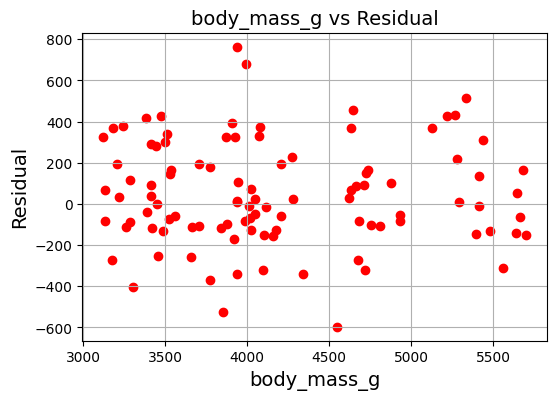

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter (data1["pred1"], data1["residual1"], color="red") 
plt.title("body_mass_g vs Residual", fontsize=14) 
plt.xlabel("body_mass_g", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()

<Axes: xlabel='residual1', ylabel='Density'>

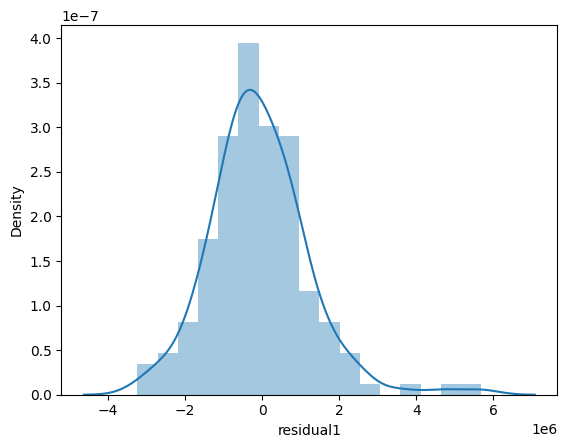

In [ ]:
sns.distplot(data1.residual1)

# Another Model for Reference

In [ ]:
df['sex'] = df['sex'].astype(float)


In [ ]:
rfregressor1 = RandomForestRegressor(max_depth=10, min_samples_split=50, criterion="friedman_mse") 
rfregressor1.fit(X1_train, y1_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_split=50)

In [ ]:
pred_train1 = rfregressor1.predict(X1_train)
pred_test1 = rfregressor1.predict(X1_test)

In [ ]:
print("\nRF Score for X1:")

rfscore_train1 = rfregressor1.score(X1_train, y1_train)
rfscore_test1 = rfregressor1.score(X1_test, y1_test)
print(rfscore_train1)
print(rfscore_test1)


RF Score for X1:
0.8535846630847832
0.8736764835228414


In [ ]:
print("\nRMSE Score for X1:")
rmse_rf_train1 = mean_squared_error(y1_train, pred_train1, squared=False) 
rmse_rf_test1 = mean_squared_error(y1_test, pred_test1, squared=False)
print(rmse_rf_train1)
print(rmse_rf_test1)


RMSE Score for X1:
311.47400521155043
276.88916030916846


In [ ]:
data1 = y1_test.copy()
data1["pred1"] = pred_test1
data1["residual1"] = data1["body_mass_g"] - data1["pred1"]
data1.head()

,body_mass_g,pred1,residual1
30,3250.0,3393.079546,-143.079546
317,4875.0,4871.707135,3.292865
79,4000.0,3981.565814,18.434186
201,3675.0,3462.486580,212.513420
63,4050.0,3971.497209,78.502791


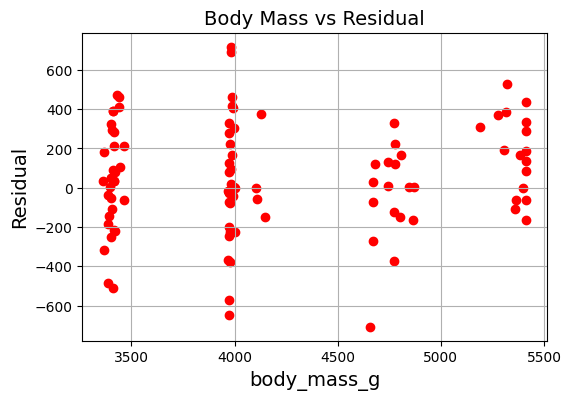

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter (data1["pred1"], data1["residual1"], color="red") 
plt.title("Body Mass vs Residual", fontsize=14) 
plt.xlabel("body_mass_g", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
pd.DataFrame(rfregressor1.feature_importances_, index=X1_test.columns).sort_values(
        0, ascending=False
)

,0
species_Gentoo,0.593646
flipper_length_mm,0.240191
sex,0.158432
culmen_depth_mm,0.005114
culmen_length_mm,0.002617
species_Chinstrap,0.000000
island_Dream,0.000000
island_Torgersen,0.000000
